# 将static_fun.py和该文件放入一个文件夹里

In [10]:
import numpy as np
import static_fun
import importlib
importlib.reload(static_fun)
from static_fun import sde_rk2_gen
from static_fun import gen_ensemble
from static_fun import time_cut
from static_fun import averge_ensemble
from static_fun import gen_ensemble_data_by_ensemble
from static_fun import correction_fun_ensemble
from static_fun import averge_ensemble_A
from static_fun import density_fun
from static_fun import Boltzman_distribution
import matplotlib.pyplot as plt

## 1.欠阻尼

In [29]:
## 设定全局参数值，保证是过阻尼
T=2  ##温度
K=1  ## 玻尔兹曼常量
m=1  ##质量
gamma=0.4
beta=gamma/2
D=K*T*gamma/m  ## 扩散系数张量用于生成随机力
x0=np.array([0,0])
lamb=0.2

omega=1
omega_0=(1/2*omega**2+(1/4*omega**4+3*lamb*T/m)**0.5)**0.5
omega_1=(omega_0**2-beta**2)**0.5
t=np.arange(0,100,0.1)
def f(x,t):
    global gamma
    global omega
    global lamb
    return np.array([x[1],-gamma*x[1]-omega**2*x[0]-lamb*x[0]**3])

def noise(delta_t):
    global D
    return np.array([0,(2*D*delta_t)**0.5*np.random.normal()])



In [24]:
def X_square_gen(i):         ## 或者一个gen返回全部的系综值，后面再拿出来处理
    x0=np.array([0,0])
    global t
    X=sde_rk2_gen(x0,t,f,noise)
    return X

ensemble=gen_ensemble(X_square_gen,10000)
ensemble_stable,index_t_stable=time_cut(ensemble,N=0.3)
data_json=averge_ensemble(ensemble_stable)
t_stable=t[index_t_stable[0]:index_t_stable[1]]
t_stable=t_stable-t_stable.min()
correctinon_data=gen_ensemble_data_by_ensemble(correction_fun_ensemble,ensemble_stable)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


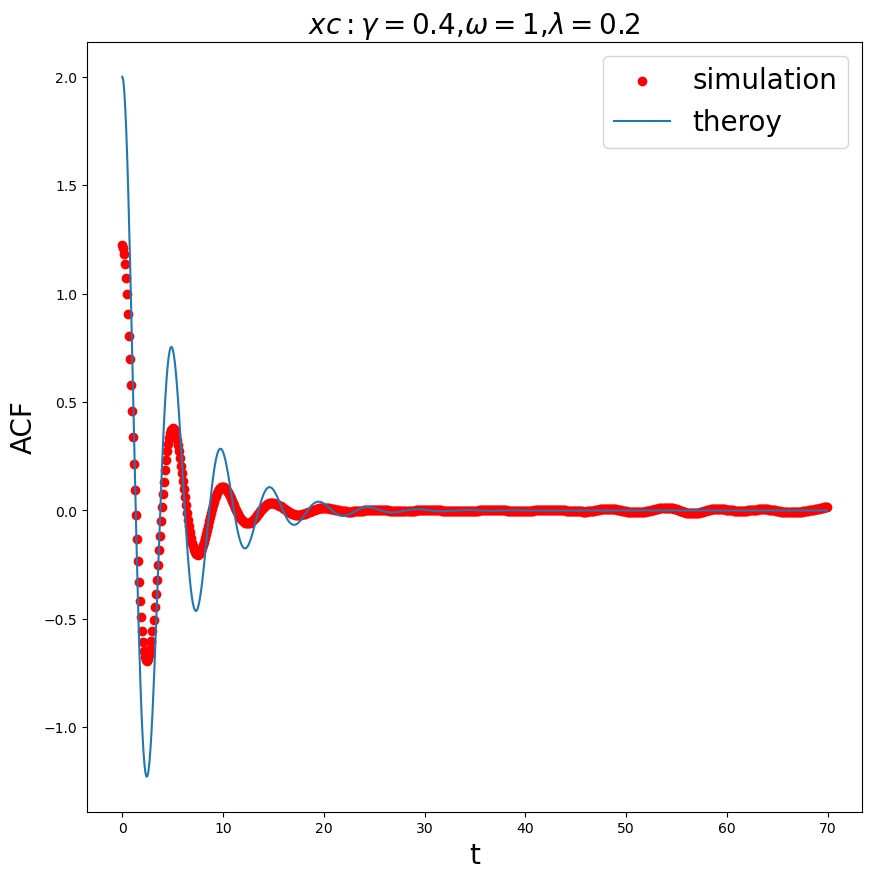

In [41]:
index_t=correctinon_data[1][1]
ensemble_correction=[correctinon_data[i][0] for i in range(len(correctinon_data))]
correction_json=averge_ensemble(ensemble_correction)
xx_c_simulation=correction_json['x'][:,0]
vv_c_simulation=correction_json['x'][:,3]
xx_c_theroy=D*np.exp(-beta*t_stable)*(np.cos(omega_1*t_stable)+beta/omega_1*np.sin(omega_1*t_stable))/(2*beta*omega**2)
vv_c_theroy=D*np.exp(-beta*t_stable)*(np.cos(omega_1*t_stable)-beta/omega_1*np.sin(omega_1*t_stable))/(2*beta)
# xx_c_theroy=D*np.exp(-beta*t_stable)*(np.cos(omega_0*t_stable)+beta/omega_0*np.sin(omega_0*t_stable))/(2*beta*omega**2)
# vv_c_theroy=D*np.exp(-beta*t_stable)*(np.cos(omega_0*t_stable)-beta/omega_0*np.sin(omega_0*t_stable))/(2*beta)
plt.figure(figsize=(10,10))
plt.scatter(t_stable,xx_c_simulation,c='r')
plt.plot(t_stable,xx_c_theroy)
plt.legend(['simulation','theroy'],fontsize=20)
plt.xlabel('t',fontsize=20)
plt.ylabel('ACF',fontsize=20)
plt.title(f'$xc:\gamma={gamma}$,$\omega={omega}$,$\lambda={lamb}$',fontsize=20)
plt.savefig(f"picture/gamma_{gamma}_omega_{omega}_lambda_{lamb}x.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


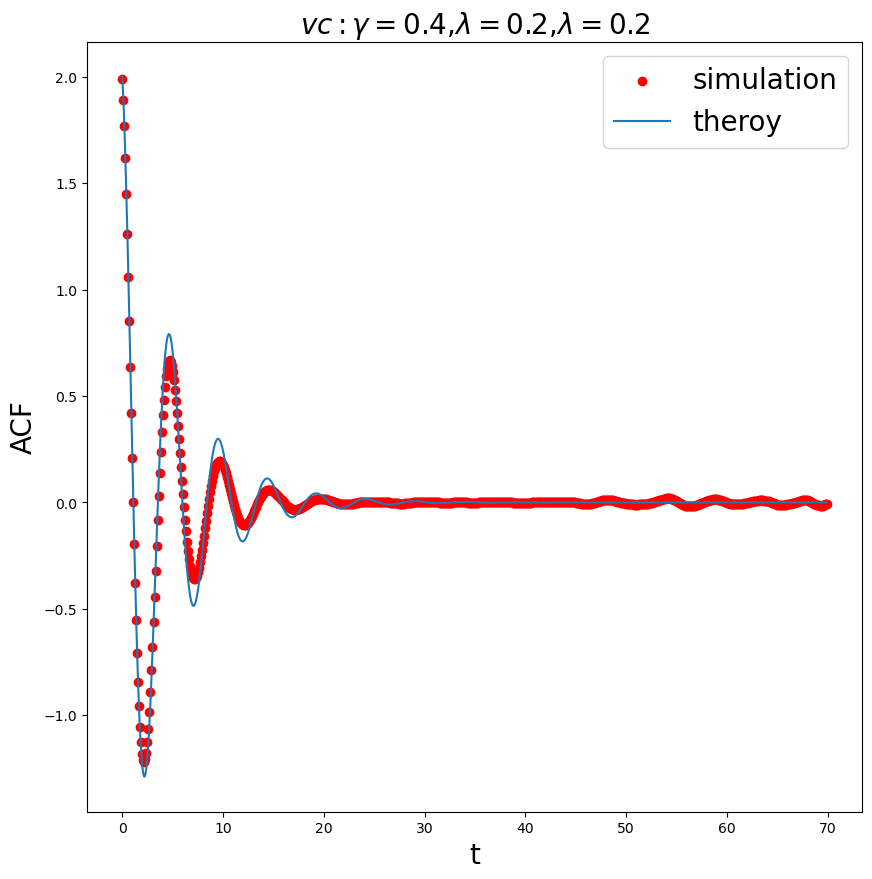

In [42]:
plt.figure(figsize=(10,10))
plt.scatter(t_stable,vv_c_simulation,c='r')
plt.plot(t_stable,vv_c_theroy)
plt.legend(['simulation','theroy'],fontsize=20)
plt.xlabel('t',fontsize=20)
plt.ylabel('ACF',fontsize=20)
plt.title(f'$vc:\gamma={gamma}$,$\lambda={lamb}$,$\lambda={lamb}$',fontsize=20)
plt.savefig(f"picture/gamma_{gamma}_omega_{omega}_lambda_{lamb}v.eps")

In [15]:
## 过阻尼情形:
## 我们过阻尼的情形可以先不去尝试，然后先去数值求解FPE。问题有以下。
## 极限阻尼情况，可以求lambda关于非线性的关系，指数值方面

## 一般阻尼情况，尝试求解二维FPE，看看能否解出来本征值







## 能量均值

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


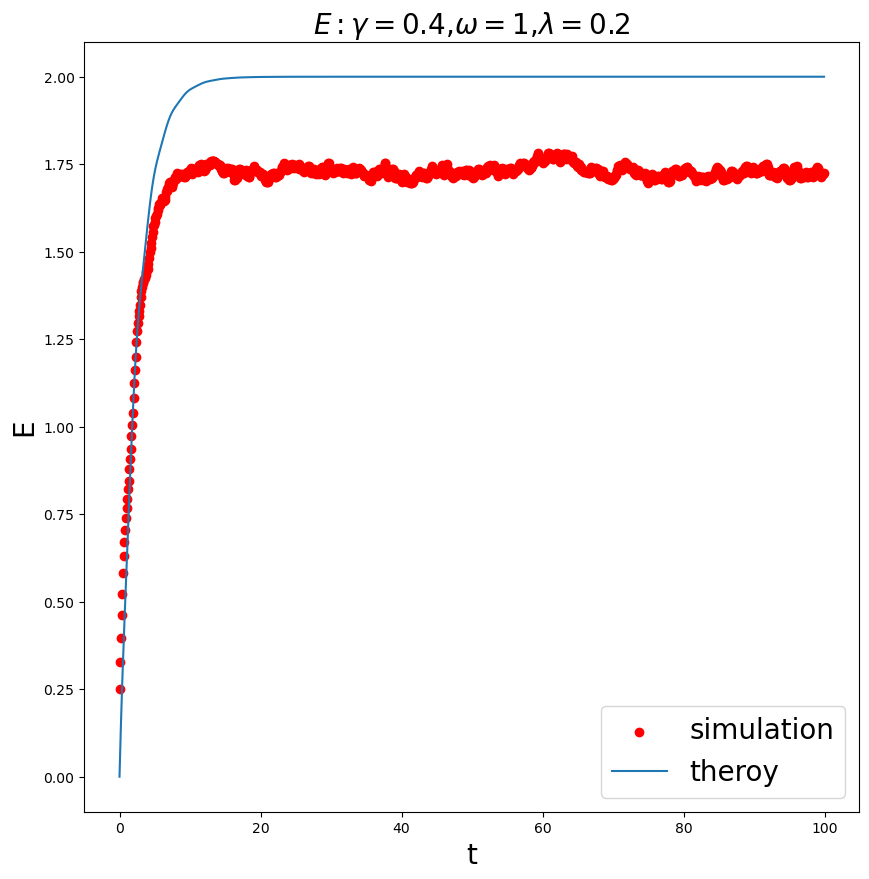

In [39]:
def hamiton(X):## 计算一个系综成员的能量
    global m
    global omega
    global lamb
    E=1/2*m*X[:,1]**2+1/2*m*omega**2*X[:,0]**2+1/4*m*lamb**X[:,0]**4
    return np.hstack([E.reshape(-1,1)])

E_json=averge_ensemble_A(hamiton,ensemble)
E_simulation=E_json['x']
E_theroy=1/2*m*D*np.exp(-2*beta*t)*(-beta**2+beta**2*np.cos(2*omega_1*t)+omega_1**2*(np.exp(2*beta*t)-1))/(beta*omega_1**2)
plt.figure(figsize=(10,10))
plt.scatter(t,E_simulation,c='r')
plt.plot(t,E_theroy)
plt.legend(['simulation','theroy'],fontsize=20)
plt.xlabel('t',fontsize=20)
plt.ylabel('E',fontsize=20)
plt.title(f'$E:\gamma={gamma}$,$\omega={omega}$,$\lambda={lamb}$',fontsize=20)
plt.savefig(f"picture/gamma_{gamma}_omega_{omega}_lambda_{lamb}E.eps")

In [17]:
X_json=averge_ensemble(ensemble)



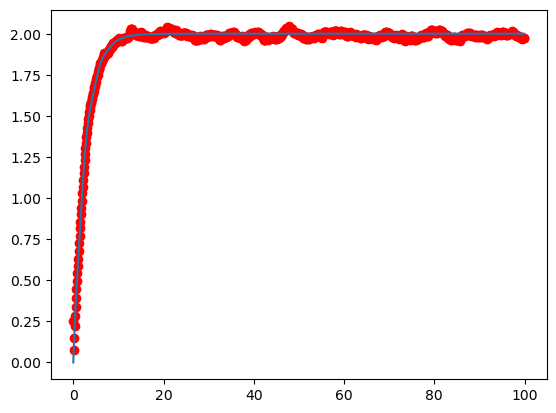

In [18]:
plt.scatter(t,E_simulation,c='r')
plt.plot(t,E_theroy)